<a href="https://colab.research.google.com/github/pavannayak9398/Machine-Learning/blob/main/Employee_Attrition_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Employee Attrition Prediction**

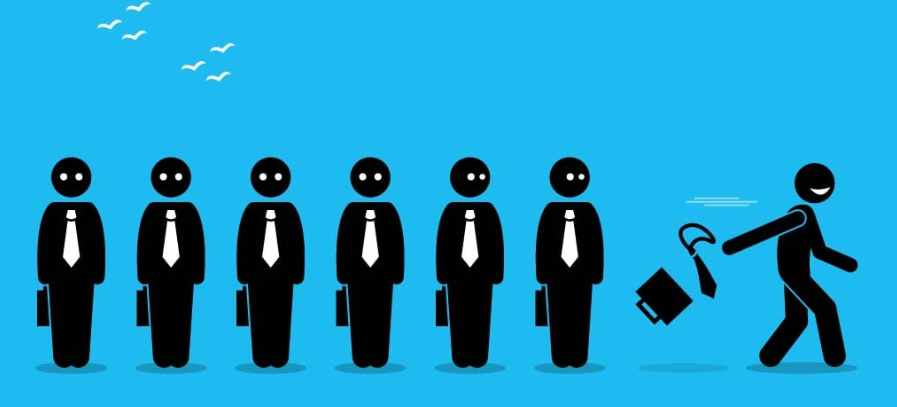

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/FSDS @Kodi Senapati/Colab files/FSDS/Projects/Datasets/HR-Employee-Attrition.csv")

df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [ ]:
one=[i for i in df.columns if df[i].nunique() == 1]

for i in one:
  print(i)

EmployeeCount
Over18
StandardHours


**1. Data Cleaning (Removing irrelevant or redundant columns)**

* Drop EmployeeCount, StandardHours and Over18 (same for all, no use).
* Drop EmployeeNumber (unique identifier, not useful for modeling).

In [ ]:
# Finding the columns that has only 1 value all over the data




df.drop(columns=["EmployeeCount", "Over18", "StandardHours", "EmployeeNumber"], axis=1,inplace=True)
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [ ]:
# Checking whether the value matches the datatype



print(df.info())
print(df.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

**2. Check for Null Values**

In [ ]:

df.isnull().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EnvironmentSatisfaction,0
Gender,0


**3. Drop Duplicate Records**

In [ ]:
df.drop_duplicates(inplace=True)

**4. Data Transformation**

In [ ]:
# Find Categorical values and further split them to binary and multi values to perform label encoder & dummies


categorical_col=df.select_dtypes(include=['object']).columns.tolist()

binary_col=[i for i in categorical_col if df[i].nunique()==2]
multi_col=[i for i in categorical_col if df[i].nunique()>2]

print("Categorical Columns:", categorical_col)
print(len(categorical_col))
print("Binary Value Columns:", binary_col)
print(len(binary_col))
print("Multiple Value Columns:", multi_col)
print(len(multi_col))

Categorical Columns: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
8
Binary Value Columns: ['Attrition', 'Gender', 'OverTime']
3
Multiple Value Columns: ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']
5


In [ ]:
# Label Encode the binary and pd.get_dummies multi class


from sklearn.preprocessing import LabelEncoder

for i in binary_col:
  le=LabelEncoder()
  df[i]=le.fit_transform(df[i])


df=pd.get_dummies(df, columns=multi_col, dtype=int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   Attrition                          1470 non-null   int64
 2   DailyRate                          1470 non-null   int64
 3   DistanceFromHome                   1470 non-null   int64
 4   Education                          1470 non-null   int64
 5   EnvironmentSatisfaction            1470 non-null   int64
 6   Gender                             1470 non-null   int64
 7   HourlyRate                         1470 non-null   int64
 8   JobInvolvement                     1470 non-null   int64
 9   JobLevel                           1470 non-null   int64
 10  JobSatisfaction                    1470 non-null   int64
 11  MonthlyIncome                      1470 non-null   int64
 12  MonthlyRate         

**5. Check Data Imbalance**

* If Imbalance exists, consider using SMOTE, Class Weights, or Undersampling/
Oversampling

Attrition
0    83.877551
1    16.122449
Name: proportion, dtype: float64


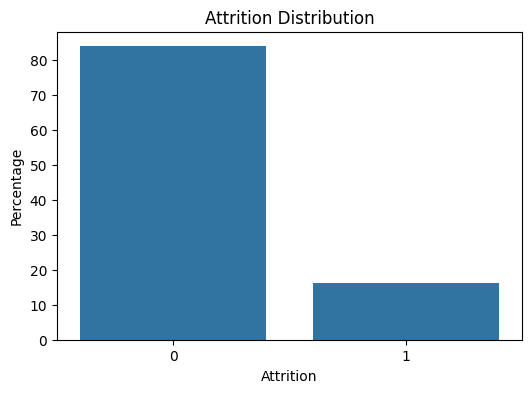

In [ ]:
# Check for DataImbalance


# Count the number of attrition and non attrition employees
attrition_counts=df['Attrition'].value_counts(normalize=True) * 100
print(attrition_counts)


#Plot the distribution
plt.figure(figsize=(6,4))
sns.barplot(x=attrition_counts.index, y=attrition_counts.values)
plt.xlabel("Attrition")
plt.ylabel("Percentage")
plt.title("Attrition Distribution")
plt.show()

In [ ]:
# As Data is Imbalanced, need to apply SMOTE for Balancing



from imblearn.over_sampling import SMOTE
from collections import Counter

# Separate features and target variable
X=df.drop(columns=['Attrition']) #Feature
y=df['Attrition'] #Target

#Display original class distribution
print("Original Class Distribution:", Counter(y))

#Apply SMOTE
smote=SMOTE(sampling_strategy=1, random_state=42)
X_re, y_re=smote.fit_resample(X,y)

#Display new class distribution
print("New Class Distribution:", Counter(y_re))

#Convert back to DataFrame
df_re=pd.DataFrame(X_re, columns=X.columns)
df_re['Attrition']=y_re


Original Class Distribution: Counter({0: 1233, 1: 237})
New Class Distribution: Counter({1: 1233, 0: 1233})


Attrition
1    50.0
0    50.0
Name: proportion, dtype: float64


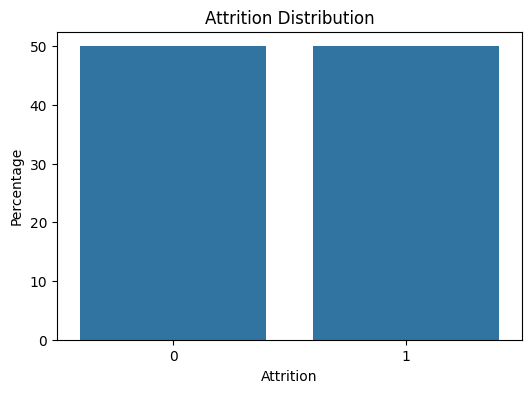

In [ ]:
# Check for DataImbalance


# Count the number of attrition and non attrition employees
attrition_counts=df_re['Attrition'].value_counts(normalize=True) * 100
print(attrition_counts)


#Plot the distribution
plt.figure(figsize=(6,4))
sns.barplot(x=attrition_counts.index, y=attrition_counts.values)
plt.xlabel("Attrition")
plt.ylabel("Percentage")
plt.title("Attrition Distribution")
plt.show()

**6. Check Correlation Between Features**

<Axes: >

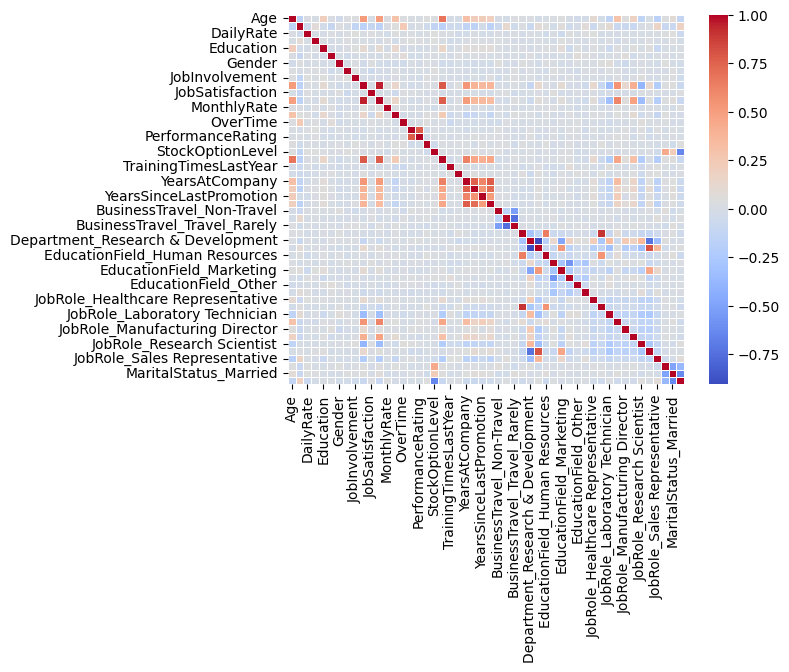

In [ ]:
corr_matrix= df.corr()
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", linewidth=0.5)



In [ ]:
df.columns

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'BusinessTravel_Non-Travel',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'JobRole_Healthcare Representative',
       'JobRole_Human Re

In [ ]:
# Select the columns that needs to be standardized

col=['DailyRate', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate' ]

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
df_re[col]=scaler.fit_transform(df_re[col])




In [ ]:
print(df_re.head())

   Age  DailyRate  DistanceFromHome  Education  EnvironmentSatisfaction  \
0   41   0.851044                 1          2                        2   
1   49  -1.327454                 8          1                        3   
2   37   1.568386                 2          2                        4   
3   33   1.618680                 3          4                        4   
4   27  -0.501583                 2          1                        1   

   Gender  HourlyRate  JobInvolvement  JobLevel  JobSatisfaction  ...  \
0       0    1.475216               3         2                4  ...   
1       1   -0.247316               2         2                2  ...   
2       1    1.370820               2         1                3  ...   
3       0   -0.508305               3         1                3  ...   
4       1   -1.343472               3         1                2  ...   

   JobRole_Manager  JobRole_Manufacturing Director  JobRole_Research Director  \
0                0           

In [ ]:
# Load the dataset (assuming df_re is preprocessed)
X = df_re.drop(columns=["Attrition"])  # Features
y = df_re["Attrition"]  # Target Variable

# Split to test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)

### **Apply Multiple Classification Algorithms**

In [ ]:
# Import Classification Models

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report


#Define Models
models={
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier()
}

results={}

for name, model in models.items():
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  results[name] = accuracy
  print(f"{name} Accuracy: {accuracy:.4f}")
  print(classification_report(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.9170
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       247
           1       0.94      0.89      0.91       247

    accuracy                           0.92       494
   macro avg       0.92      0.92      0.92       494
weighted avg       0.92      0.92      0.92       494

SVM Accuracy: 0.8077
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       247
           1       0.81      0.80      0.81       247

    accuracy                           0.81       494
   macro avg       0.81      0.81      0.81       494
weighted avg       0.81      0.81      0.81       494

Decision Tree Accuracy: 0.8543
              precision    recall  f1-score   support

           0       0.90      0.80      0.85       247
           1       0.82      0.91      0.86       247

    accuracy                           0.85       494
   macro avg       0.86      0.85      

**Identify the Best Model**

In [ ]:
# Identify the best model based on accuracy
best_model_name = max(results, key=results.get)
print(f"Best Model: {best_model_name}")

Best Model: Random Forest


**The best model is "Random Forest" and we will apply GridSearchCV to find the optimal hyperparameters**

In [ ]:
from sklearn.model_selection import GridSearchCV

#Define hyperparameters grid for RandomForest
param_grid={
    "n_estimators": [100, 200, 300],
    "max_depth": [10, 20, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
 }

# Initialize model
rf = RandomForestClassifier(random_state=42)

# Perform Grid Search
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate the best model
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
print("Final Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Final Accuracy: 0.9291497975708503
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       247
           1       0.95      0.91      0.93       247

    accuracy                           0.93       494
   macro avg       0.93      0.93      0.93       494
weighted avg       0.93      0.93      0.93       494



**Trying to finetune the XGBoost to check the accuracy**

In [ ]:
param_grid = {
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [3, 6, 9],
    "n_estimators": [100, 200, 300]
}
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric="logloss")

grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate the best model
best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(X_test)
print("Final Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:26:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200}
Final Accuracy: 0.9190283400809717
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       247
           1       0.94      0.89      0.92       247

    accuracy                           0.92       494
   macro avg       0.92      0.92      0.92       494
weighted avg       0.92      0.92      0.92       494



# **Summary:**

* **RandomForest** performed slightly better than XGBoost with a final accuracy of 93% compared to 92%.
* **Precision and Recall:** Both models showed balanced precision and recall, but RandomForest maintained a slightly better balance across both classes.
* **F1-Score:** RandomForest achieved a higher macro and weighted F1-Score (0.93) compared to XGBoost (0.92), indicating better overall performance.


**RandomForest** is the better-performing model for this dataset due to its higher accuracy and balanced precision-recall metrics. However, the difference is marginal, so if training time or interpretability is a concern, XGBoost is still a solid choice.